In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [5]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# **Applying One Hot Encoding**

In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X=df.drop(columns=['Exited'])
y=df['Exited'].values

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf =scaler.transform(X_test)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [42]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model=Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [72]:
history=model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.5290 - accuracy: 0.7937 - val_loss: 0.4975 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7958 - val_loss: 0.4958 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7958 - val_loss: 0.4953 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7958 - val_loss: 0.4945 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7958 - val_loss: 0.4942 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7958 - val_loss: 0.4941 - val_accuracy: 0.7969

In [73]:
model.layers[0].get_weights()

[array([[-0.42285138,  0.48696214, -0.08267722,  0.13746321,  0.4673444 ,
          0.05749812,  0.26209646,  0.42695004, -0.00533257, -0.4375843 ,
         -0.3508462 ],
        [ 0.29164198, -0.470981  , -0.20123863,  0.38682592,  0.13915624,
         -0.47080055,  0.29727817, -0.22648251, -0.46662775,  0.14786845,
         -0.02225145],
        [-0.15180488, -0.2717058 , -0.06681129, -0.2710525 ,  0.17227298,
          0.4805782 , -0.05506057, -0.26528245, -0.22717036, -0.03119099,
         -0.13722326],
        [-0.23380058,  0.33878398, -0.11136113, -0.5019666 , -0.3977295 ,
         -0.24305892,  0.14215684, -0.5141291 , -0.18469375,  0.43621248,
          0.02124542],
        [ 0.51444477,  0.36376876, -0.03950601,  0.12072915, -0.3399467 ,
         -0.356555  ,  0.47486508, -0.28191465,  0.31407657,  0.32338247,
         -0.33596182],
        [-0.340475  , -0.4201758 , -0.0049198 , -0.18702865, -0.17424828,
          0.00825437,  0.2810672 ,  0.34018606, -0.35979182, -0.3572451

In [74]:
model.layers[1].get_weights()

[array([[-0.29905164, -0.34964344, -0.35872227, -0.34658247, -0.3529668 ,
          0.21705274,  0.26337323,  0.18947002, -0.07617674,  0.5332843 ,
         -0.51554734],
        [ 0.08728183, -0.01336435, -0.04759428,  0.5908107 , -0.20944458,
          0.15614563, -0.22521314, -0.29656732,  0.01672735,  0.04410373,
         -0.41861346],
        [ 0.17760095,  0.17291053,  0.19499712,  0.3945459 ,  0.14844137,
          0.2447428 , -0.31608343, -0.21383542,  0.42324057,  0.5155056 ,
         -0.06117862],
        [-0.788612  ,  0.6263965 ,  0.95751953,  0.33920377,  0.4153404 ,
          0.9132326 , -0.81538373,  0.6647472 , -0.65424526, -0.17239965,
          0.0457037 ],
        [-0.08699579,  0.688855  , -0.10911606,  0.24102287,  0.03578587,
          0.11656912, -0.05635988, -0.22948301, -0.03826116, -0.27749988,
         -0.18454824],
        [ 0.17420638, -0.366845  , -0.03901885, -0.31331035, -0.2645524 ,
         -0.35754812,  0.24615273,  0.46808806, -0.25584382,  0.1689624

In [75]:
model.layers[2].get_weights()

[array([[ 0.20015207],
        [-0.74018925],
        [-0.27060995],
        [-0.14962097],
        [-0.34649685],
        [-0.27824414],
        [ 0.21992837],
        [-0.64849275],
        [ 0.08953568],
        [ 0.23388775],
        [ 0.06676326]], dtype=float32),
 array([-0.11275768], dtype=float32)]

In [76]:
y_pred=model.predict(X_test_trf)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.2034705 ],
       [0.19791287],
       [0.21903902],
       ...,
       [0.21389578],
       [0.20885816],
       [0.19566406]], dtype=float32)

# We have prediction in probabilities so we will convert it into 0 and 1 based on threshold or using argmax function

In [77]:
#y_pred=y_pred.argmax(axis=-1)
y_pred=np.where(y_pred>0.5,1,0)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

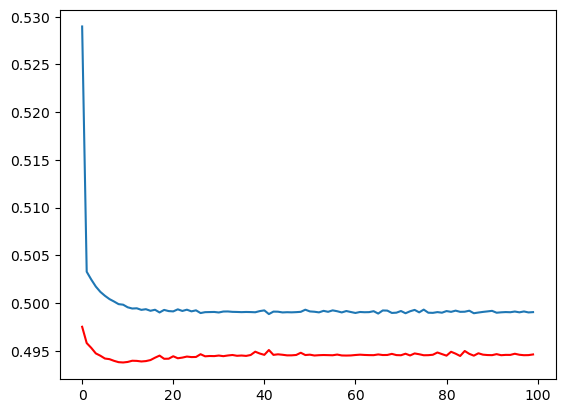

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='r')

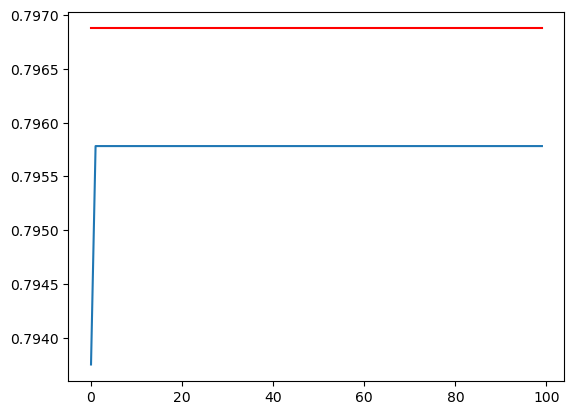

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],color='r')